In [1]:
%matplotlib inline

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


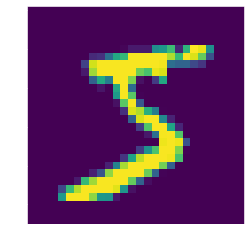

In [5]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [6]:
#check image shape
X_train[0].shape

(28, 28)

In [7]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

2022-06-22 09:04:29.099315: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2315 - accuracy: 0.9521 - val_loss: 0.0883 - val_accuracy: 0.9715
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0651 - accuracy: 0.9797 - val_loss: 0.0914 - val_accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.1017 - val_accuracy: 0.9730


In [12]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[7.8591067e-10, 8.0157168e-18, 3.4887584e-08, 7.4736818e-06,
        1.6189415e-17, 1.4441585e-12, 4.2930910e-18, 9.9999249e-01,
        5.1906972e-11, 4.5399820e-10],
       [3.7666857e-07, 1.2269665e-07, 9.9999952e-01, 3.4537551e-10,
        1.0415386e-14, 4.4198379e-14, 5.2692265e-08, 7.6940048e-18,
        3.3952194e-10, 3.8657533e-16],
       [5.9733080e-04, 9.9644524e-01, 6.3813094e-04, 1.5519689e-06,
        3.6882242e-04, 4.4524594e-04, 1.6642355e-04, 1.6731249e-06,
        1.3355055e-03, 8.1452789e-08],
       [9.9999988e-01, 7.9495607e-14, 2.7001832e-09, 3.9742138e-12,
        1.9275714e-12, 8.9635875e-11, 5.4191172e-09, 2.4338502e-12,
        4.6840730e-12, 1.4109138e-07]], dtype=float32)

In [13]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)